In [1]:
name_code           = "Testing_ElectronNuclearDynamics_BinaryIOData_v2";
path_models         = "../outputs/"*name_code*"/models/";
path_images         = "../outputs/"*name_code*"/images/";
path_plots          = "../outputs/"*name_code*"/plots/";

In [2]:
# set unit convertion constant
const Bohr_radius_meter=5.29177210903e−11;                        # [m]
const Angstrom_to_meter=1e−10;                                    # [m/Å]
const Angstrom_to_au=Angstrom_to_meter*(1.0/Bohr_radius_meter);   # [au/Å]
const Femtoseconds_to_au=(1.0/0.0218884);                         # [au/fs
const m=1.0;            # electron mass
const M=2000.0*m;       # proton mass
const ħ=1.0;            # Planck constant

In [3]:
n_1D_r=400;n_1D_R=400;
dim_time=92;
set_Rc_value=1; # set_Rc_value=1 or set_Rc_value=2
if (set_Rc_value==1)
    Rc=1.5*Angstrom_to_au;  # screening parameter
    χ₀=-3.5*Angstrom_to_au; # Gaussian's center of init state
    n_eigenstate=1;         # fundamental state
elseif (set_Rc_value==2) 
    Rc=5.0*Angstrom_to_au;
    χ₀=-1.5*Angstrom_to_au;
    n_eigenstate=2;  # first excited state
end

1

In [4]:
include("./BinaryFileIO_testing.jl");

In [5]:
outfile_name = path_images*"relative_error_convergence_study_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
convergence_vector = read_bin(outfile_name;matrix_data=false);
println(convergence_vector[end])

0.44506927274162883


In [6]:
outfile_name = path_images*"electronic_density_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
electronic_ρ_matrix_χ_plus_r = read_bin(outfile_name;matrix_data=true,c_dim=(dim_time+1));
electronic_ρ_matrix_χ = electronic_ρ_matrix_χ_plus_r[:,2:end];

outfile_name = path_images*"nuclear_density_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
nuclear_ρ_matrix_χ_plus_r = read_bin(outfile_name;matrix_data=true,c_dim=(dim_time+1));
nuclear_ρ_matrix_χ = nuclear_ρ_matrix_χ_plus_r[:,2:end];

outfile_name = path_images*"total_shannon_entropy_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
total_S_2D_χ_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);
total_S_2D_χ = total_S_2D_χ_plus_t[:,2:end];

In [7]:
DOF_r=electronic_ρ_matrix_χ_plus_r[:,1];
DOF_χ=nuclear_ρ_matrix_χ_plus_r[:,1];
time_vec=total_S_2D_χ_plus_t[:,1];

In [8]:
using Plots;

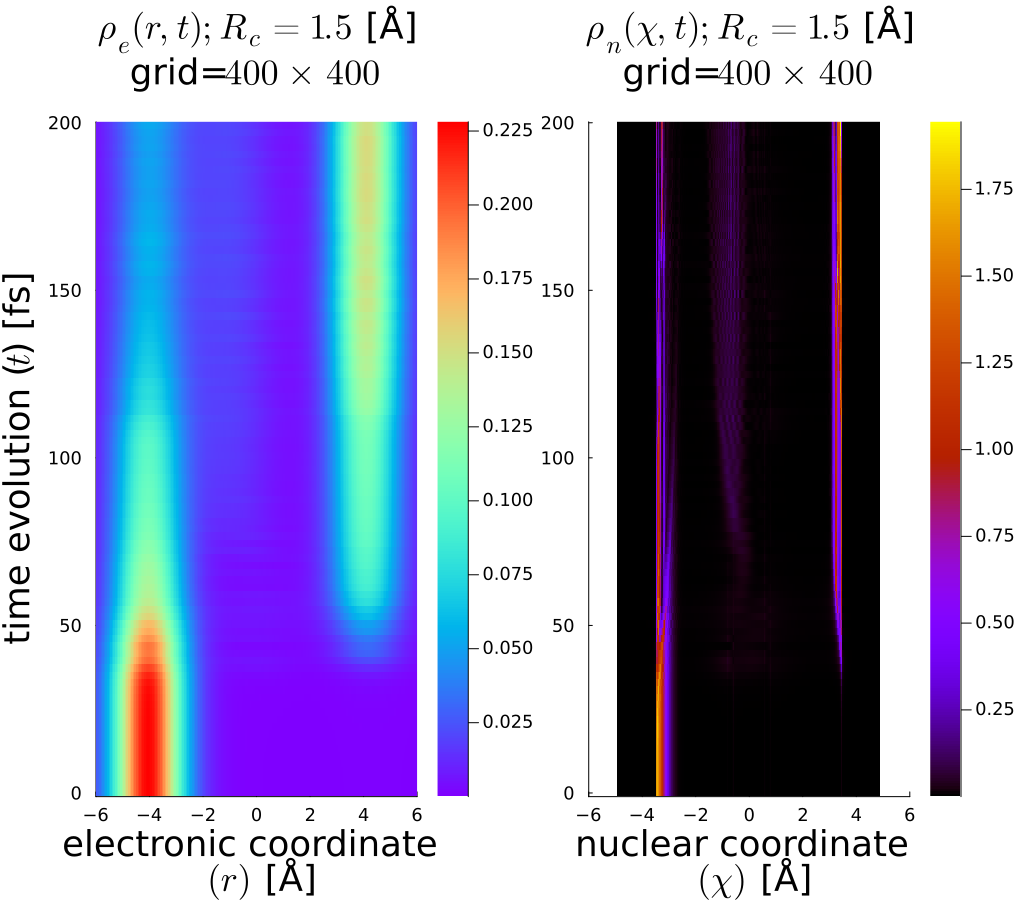

In [9]:
if (set_Rc_value==1)
    plot1=heatmap(DOF_r./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(electronic_ρ_matrix_χ),
                c = :rainbow1,xlims=(-6,6),grid = false)
else (set_Rc_value==2)
    plot1=heatmap(DOF_r./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(electronic_ρ_matrix_χ),
                c = :rainbow1,xlims=(-6,6),grid = false)
end
plot1=plot!(xlabel="electronic coordinate \n \$(r)\$ [Å]",ylabel="time evolution (\$t\$) [fs]")
plot1=plot!(title="\$\\rho_{e}(r,t);R_{c}=$(round(Rc/Angstrom_to_au,digits=2))\$ [Å]\ngrid=\$$(n_1D_r)\\times$(n_1D_r)\$\n")
plot1=plot!(xtickfont=font(12),ytickfont=font(12),xguidefontsize=24,yguidefontsize=24,titlefontsize=24)

if (set_Rc_value==1)
    plot2=heatmap(DOF_χ./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(nuclear_ρ_matrix_χ),
                c = :gnuplot,xlims=(-6,6),grid = false)
else (set_Rc_value==2)
    plot2=heatmap(DOF_χ./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(nuclear_ρ_matrix_χ),
                c = :rainbow1,xlims=(-6,6),grid = false)
end
plot2=plot!plot2=plot!(xlabel="nuclear coordinate \n \$(\\chi)\$ [Å]")
plot2=plot!(title="\$\\rho_{n}(\\chi,t);R_{c}=$(round(Rc/Angstrom_to_au,digits=2))\$ [Å]\ngrid=\$$(n_1D_r)\\times$(n_1D_r)\$\n")
plot2=plot!(xtickfont=font(12),ytickfont=font(12),xguidefontsize=24,titlefontsize=24)

plot3=plot(plot1,plot2,layout=(1,2),size=(1024,912))
# savefig(plot3,path_images_paper*"probability_density_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).eps")
display(plot3)

In [10]:
using DelimitedFiles

Cargamos datos del paper para comparar

In [11]:
path_images_paper = "/home/martin/Documents/research/Schurger_Engel_paper/paper_data/"
# entropía diferencial de shannon total
outfile_name = path_images_paper*"total_differential_shannon_entropy_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
total_S_2D_χ_plus_t_paper = readdlm(outfile_name, Float64);
# entropía diferencial de shannon electronica
outfile_name = path_images_paper*"electronic_differential_shannon_entorpy_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
electronic_S_χ_plus_t_paper = readdlm(outfile_name, Float64);
# entropía diferencial de shannon nuclear
outfile_name = path_images_paper*"nuclear_differential_shannon_entorpy_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
nuclear_S_χ_plus_t_paper = readdlm(outfile_name, Float64);
# información mutua
outfile_name = path_images_paper*"mutual_information_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
mutual_info_χ_plus_t_paper = readdlm(outfile_name, Float64);

# valor de expectación de la coordenada electrónica
outfile_name = path_images_paper*"electronic_expectation_value_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
r_ExpValue_χ_plus_t_paper = readdlm(outfile_name, Float64);
# valor de expectación de la coordenada nuclear
outfile_name = path_images_paper*"nuclear_expectation_value_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
χ_ExpValue_plus_t_paper = readdlm(outfile_name, Float64);
# varianza de la coordenada nuclear
outfile_name = path_images_paper*"electronic_variance_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
r_variance_χ_plus_t_paper = readdlm(outfile_name, Float64);
# varianza de la coordenada nuclear
outfile_name = path_images_paper*"nuclear_variance_Rc$(round(Rc/Angstrom_to_au;digits=2))_paper.dat"
χ_variance_plus_t_paper = readdlm(outfile_name, Float64);

In [12]:
outfile_name = path_images*"electronic_density_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
electronic_ρ_matrix_χ_plus_r = read_bin(outfile_name;matrix_data=true,c_dim=(dim_time+1));
electronic_ρ_matrix_χ = electronic_ρ_matrix_χ_plus_r[:,2:end];

In [13]:
# entropía diferencial de shannon electronica
outfile_name = path_images*"electronic_shannon_entropy_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
electronic_S_χ_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);
electronic_S_χ = electronic_S_χ_plus_t[:,2:end];
# entropía diferencial de shannon nuclear
outfile_name = path_images*"nuclear_shannon_entropy_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
nuclear_S_χ_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);
nuclear_S_χ = nuclear_S_χ_plus_t[:,2:end];

# valor de expectación de la coordenada electrónica
outfile_name = path_images*"ExpectationValue_r_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
r_ExpValue_χ_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);
r_ExpValue_χ = r_ExpValue_χ_plus_t[:,2:end];
# valor de expectación de la coordenada nuclear
outfile_name = path_images*"ExpectationValue_χ_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
χ_ExpValue_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);
χ_ExpValue = χ_ExpValue_plus_t[:,2:end];
# valor de expectación de la coordenada nuclear
outfile_name = path_images*"Variance_r_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
r_variance_χ_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);
r_variance_χ = r_variance_χ_plus_t[:,2:end];
# valor de expectación de la coordenada nuclear
outfile_name = path_images*"Variance_χ_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2))_grid$(n_1D_r)x$(n_1D_R).bin"
χ_variance_plus_t = read_bin(outfile_name;matrix_data=true,c_dim=2);
χ_variance = χ_variance_plus_t[:,2:end];

In [14]:
mutual_info_χ=electronic_S_χ .+ nuclear_S_χ .- total_S_2D_χ;

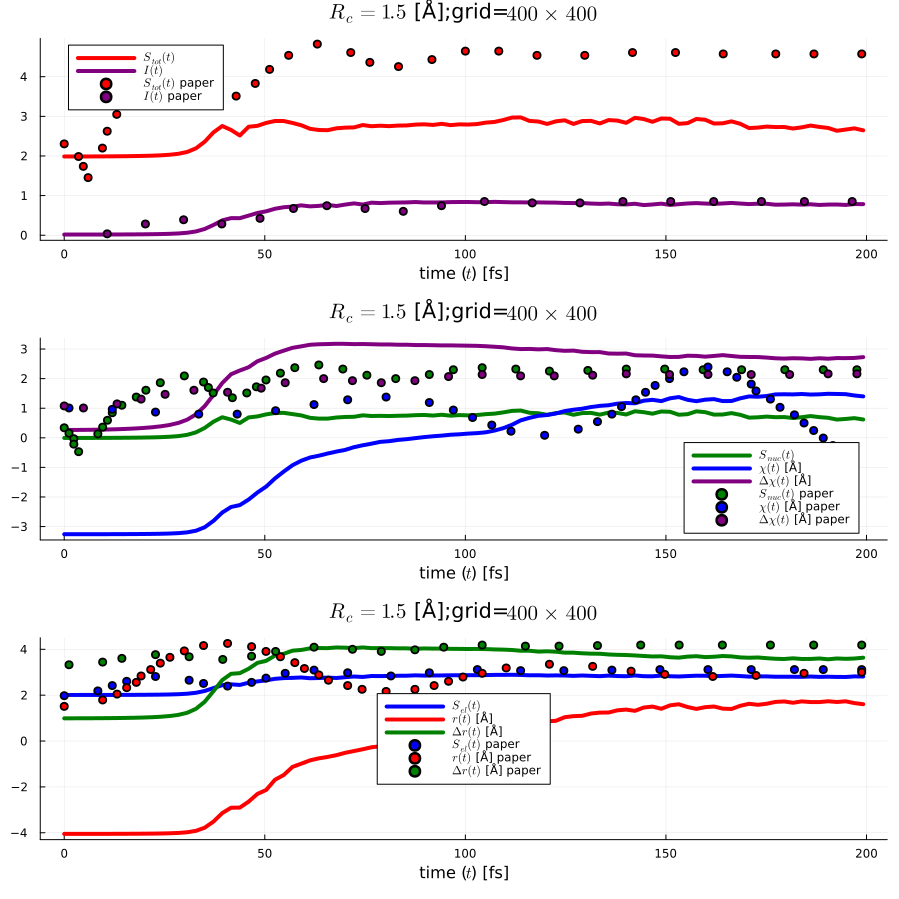

In [15]:
plot1=plot(time_vec./Femtoseconds_to_au,total_S_2D_χ,label="\$S_{tot}(t)\$";lw=4.0,lc=:red);
plot1=plot!(time_vec./Femtoseconds_to_au,mutual_info_χ,label="\$I(t)\$";lw=4.0,lc=:purple);
plot1=scatter!(total_S_2D_χ_plus_t_paper[:,1],total_S_2D_χ_plus_t_paper[:,2],label="\$S_{tot}(t)\$ paper";markersize=4.0,mc=:red);
plot1=scatter!(mutual_info_χ_plus_t_paper[:,1],mutual_info_χ_plus_t_paper[:,2],label="\$I(t)\$ paper";markersize=4.0,mc=:purple);
plot1=plot!(xlabel="time (\$t\$) [fs]",legend=:topleft)

plot2=plot(time_vec./Femtoseconds_to_au,nuclear_S_χ,label="\$S_{nuc}(t)\$";lw=4.0,lc=:green);
plot2=plot!(time_vec./Femtoseconds_to_au,χ_ExpValue./Angstrom_to_au,label="\$\\chi(t)\$ [Å]";lw=4.0,lc=:blue);
plot2=plot!(time_vec./Femtoseconds_to_au,χ_variance./Angstrom_to_au,label="\$\\Delta \\chi(t)\$ [Å]";lw=4.0,lc=:purple);
plot2=scatter!(nuclear_S_χ_plus_t_paper[:,1],nuclear_S_χ_plus_t_paper[:,2],label="\$S_{nuc}(t)\$ paper";markersize=4.0,mc=:green);
plot2=scatter!(χ_ExpValue_plus_t_paper[:,1],χ_ExpValue_plus_t_paper[:,2],label="\$\\chi(t)\$ [Å] paper";markersize=4.0,mc=:blue);
plot2=scatter!(χ_variance_plus_t_paper[:,1],χ_variance_plus_t_paper[:,2],label="\$\\Delta \\chi(t)\$ [Å] paper";markersize=4.0,mc=:purple);
plot2=plot!(xlabel="time (\$t\$) [fs]",legend=:bottomright)

plot3=plot(time_vec./Femtoseconds_to_au,electronic_S_χ,label="\$S_{el}(t)\$";lw=4.0,lc=:blue);
plot3=plot!(time_vec./Femtoseconds_to_au,r_ExpValue_χ./Angstrom_to_au,label="\$r(t)\$ [Å]";lw=4.0,lc=:red);
plot3=plot!(time_vec./Femtoseconds_to_au,r_variance_χ./Angstrom_to_au,label="\$\\Delta r(t)\$ [Å]";lw=4.0,lc=:green);
plot3=scatter!(electronic_S_χ_plus_t_paper[:,1],electronic_S_χ_plus_t_paper[:,2],label="\$S_{el}(t)\$ paper";markersize=4.0,mc=:blue);
plot3=scatter!(r_ExpValue_χ_plus_t_paper[:,1],r_ExpValue_χ_plus_t_paper[:,2],label="\$r(t)\$ [Å] paper";markersize=4.0,mc=:red);
plot3=scatter!(r_variance_χ_plus_t_paper[:,1],r_variance_χ_plus_t_paper[:,2],label="\$\\Delta r(t)\$ [Å] paper";markersize=4.0,mc=:green);
plot3=plot!(xlabel="time (\$t\$) [fs]",legend=:inside)

plot4=plot(plot1,plot2,plot3,layout=(3,1),title="\$R_{c}=$(round(Rc/Angstrom_to_au,digits=2))\$ [Å];grid=\$$(n_1D_r)\\times$(n_1D_r)\$",size=(900,900));
display(plot4)